In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
BTC_USD_data ='https://raw.githubusercontent.com/ukantjadia/30-days-of-Mahcine-Learning/Main/DAY-03/BTC-USD.csv'
df = pd.read_csv(BTC_USD_data)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-10-01,387.427002,411.697998,289.295990,338.321014,338.321014,902994450
1,2014-11-01,338.649994,457.092987,320.626007,378.046997,378.046997,659733360
2,2014-12-01,378.248993,384.037994,304.231995,320.192993,320.192993,553102310
3,2015-01-01,320.434998,320.434998,171.509995,217.464005,217.464005,1098811912
4,2015-02-01,216.867004,265.610992,212.014999,254.263000,254.263000,711518700
...,...,...,...,...,...,...,...
94,2022-08-01,23336.718750,25135.589844,19600.785156,20049.763672,20049.763672,894192654543
95,2022-09-01,20050.498047,22673.820313,18290.314453,19431.789063,19431.789063,1123272250385
96,2022-10-01,19431.105469,20988.394531,18319.822266,20495.773438,20495.773438,957903424925
97,2022-11-01,20494.898438,21446.886719,15599.046875,17168.566406,17168.566406,1224531549126


In [ ]:
# Like Matplotlib, Plotly also provides various low-level, high-level, helpers interfaces to create, manipulate and render graphical figures such as charts, plots, maps, diagrams, etc based on developer preference.
import plotly.express as px
fig = px.line(df,x="Date",y=["High","Open","Close","Low"],title="Bitcoin price Evaluation from 2014 to 2022")
fig.update_yaxes(title_text="Price")
fig.show()

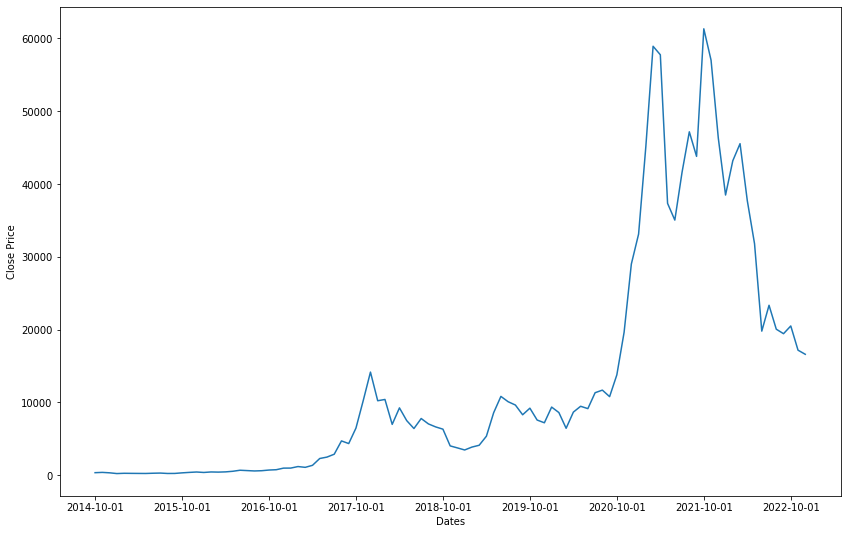

In [ ]:
time_stamp = ['2014-10-01','2015-10-01','2016-10-01','2017-10-01','2018-10-01','2019-10-01','2020-10-01','2021-10-01','2022-10-01']
fig, ax = plt.subplots(figsize=(14,9))
ax.plot(df.Date,df.Close)

ax.set_xticks(time_stamp)
ax.set_xlabel("Dates")
ax.set_ylabel("Close Price")

plt.show()

In [ ]:
# Checking for the Nan values
for i in df.columns:
  print(i,"\t\t",df[i].isna().mean()*100)

Date 		 0.0
Open 		 0.0
High 		 0.0
Low 		 0.0
Close 		 0.0
Adj Close 		 0.0
Volume 		 0.0


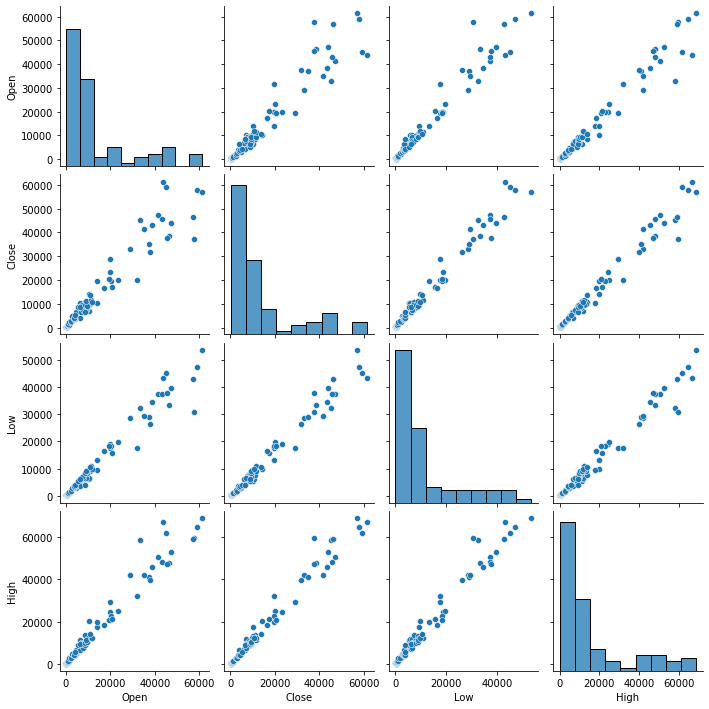

In [ ]:
df1 = df[['Open','Close','Low','High']]
sns.pairplot(df1)
# plt.tight_layout()

Since other parameters have linear relationship with Close, we are using some linear model for prediction 

In [ ]:
X = df1.drop(['Close'],axis=1)
y = df1['Close']
y.head()

0    338.321014
1    378.046997
2    320.192993
3    217.464005
4    254.263000
Name: Close, dtype: float64

Since range of data in different columns veries significantly we have to sacle independent variable X. For this we use Min-Max Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X.head()

,Open,Low,High
0,0.002791,0.002206,0.002391
1,0.001993,0.002793,0.003053
2,0.002641,0.002486,0.001988
3,0.001695,0.000000,0.001060
4,0.000000,0.000759,0.000260


# Prediction Model

In [ ]:
# Split data into test train pairs
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, shuffle=False)
Acc = []

## 1. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred_LR = model_LR.predict(X_test)
LR_pred_df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred_LR}) 
LR_pred_df.head()

,Actual,Predicted
79,37332.855469,40681.146396
80,35040.835938,35325.346179
81,41626.195313,36637.838751
82,47166.687500,45919.398726
83,43790.894531,47771.566528


In [ ]:
from sklearn.metrics import r2_score
print("Accuracy Score of the Prediction: {0}".format(r2_score(y_test,y_pred_LR)))
Acc.append(r2_score(y_test,y_pred_LR))

Accuracy Score of the Prediction: 0.9411411256004939


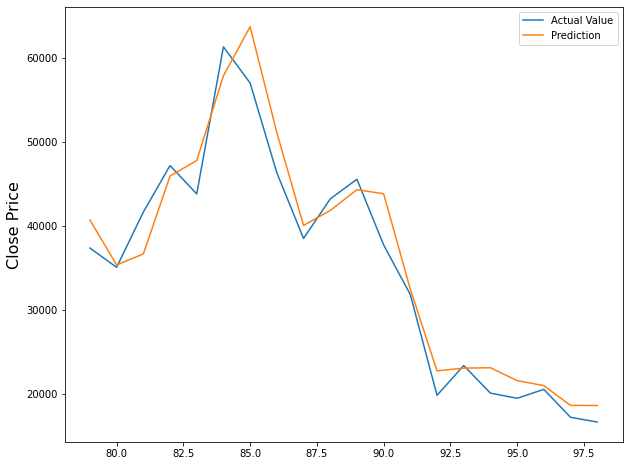

In [ ]:
plt.figure(figsize=(10,8))
plt.ylabel('Close Price',fontsize=16)
plt.plot(LR_pred_df)
plt.legend(['Actual Value','Prediction'])
plt.show()

## 2. ANN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense 

def regressor(inp_dim):
  model = Sequential()
  
  # in knn Units: means the amount of neurons, cells or whatever inside the layer
  model.add(Dense(20,kernel_initializer='normal',input_dim=inp_dim,activation='relu'))
  # layer 01 :->    Dense = neurons, input_dim =                      activation = here activation funcion is relu or sigmoid
  model.add(Dense(2,kernel_initializer='normal',activation='relu'))
  model.add(Dense(2,kernel_initializer='normal',activation='relu'))
  model.add(Dense(1, kernel_initializer='normal'))

  model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_absolute_error'])
  model.summary()
  return model


In [ ]:
model_2 = regressor(inp_dim=3)
model_2.fit(X_train,y_train,epochs=50,validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 20)                80        
                                                                 
 dense_12 (Dense)            (None, 2)                 42        
                                                                 
 dense_13 (Dense)            (None, 2)                 6         
                                                                 
 dense_14 (Dense)            (None, 1)                 3         
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
2/2 [==============================] - 1s 269ms/step - loss: 28670914.0000 - mean_absolute_error: 3776.9861 - val_loss: 761779456.0000 - val_mean_absolute_error: 21422.7969
Epoc

In [ ]:
y_pred_ann = model_2.predict(X_test)

pred_df_ann = pd.DataFrame({'Actual':y_test,'Predicted':y_pred_ann.flatten()})

1/1 [==============================] - 0s 79ms/step


ValueError: ignored

In [ ]:
from sklearn.metrics import r2_score
print("Accuracy Score of The Predictions: {0}".format(r2_score(y_test,y_pred_ann)))
Acc.append(r2_score(y_test,y_pred_ann))


In [ ]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df_ann)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

## 3. Support Vector Machine

In [ ]:
# from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()
# logreg.fit(X_train,y_train)
# y_pred_log = logreg.predict(X_test)
# acc_log = round(logreg.score(X_train,y_train)*100,2)
# acc_log

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel = 'linear')
svr.fit(X_train,y_train)
y_pred_svr = svr.predict(X_test)

In [ ]:
svr_pred_df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred_svr}) 
svr_pred_df.head()

,Actual,Predicted
79,37332.855469,4355.199315
80,35040.835938,4350.381268
81,41626.195313,4350.295857
82,47166.687500,4353.129249
83,43790.894531,4354.384384


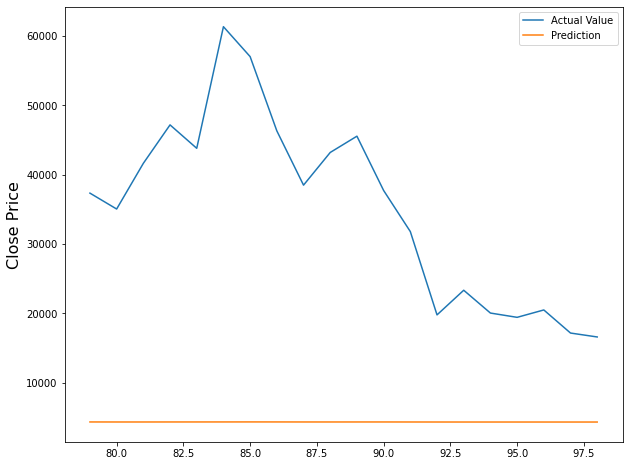

In [ ]:
plt.figure(figsize=(10,8))
plt.ylabel('Close Price',fontsize=16)
plt.plot(svr_pred_df)
plt.legend(['Actual Value','Prediction'])
plt.show()

In [ ]:
from sklearn.metrics import r2_score
print("Accuracy Score of the Prediction: {0}".format(round(r2_score(y_test,y_pred_LR)*100,2)))
Acc.append(round(r2_score(y_test,y_pred_LR)*100,2))

Accuracy Score of the Prediction: 94.11


In [ ]:
from sklearn.tree import DecisionTreeRegressor

regr = DecisionTreeRegressor(max_depth=4)
regr.fit(X_train,y_train)
y_pred_regr = regr.predict(X_test)

In [ ]:
regr_pred_df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred_regr}) 


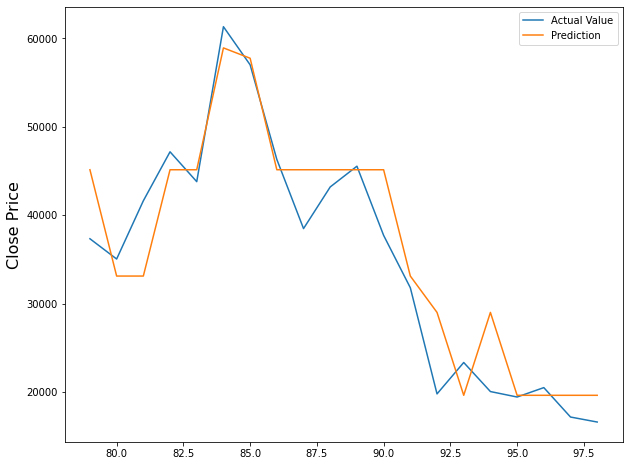

Accuracy Score of the Prediction: 0.8707813101380872


In [ ]:
plt.figure(figsize=(10,8))
plt.ylabel('Close Price',fontsize=16)
plt.plot(regr_pred_df)
plt.legend(['Actual Value','Prediction'])
plt.show()
from sklearn.metrics import r2_score
print("Accuracy Score of the Prediction: {0}".format(r2_score(y_test,y_pred_regr)))
Acc.append(r2_score(y_test,y_pred_regr))